In [1]:
from array import array
import pandas as pd
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error
import math
import numpy as np
from sklearn.grid_search import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

E:\program\anacoda\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
E:\program\anacoda\Anaconda2\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
policy_ID = 'PolicyNo' # name of the first column for identifying the policies
precleaned_train_data = 'without_outliers_cleaned_robust_scale_training_data_2016.csv'


train_data = ''
test_data = ''

df = pd.read_csv(precleaned_train_data)


cols = list(df.columns.values) # the argument return the header
print cols

features = ['Vehicle_Youthful_Driver_Training_Code','SYS_Renewed','Policy_Billing_Code','Vehicle_Passive_Restraint','Vehicle_Collision_Coverage_Deductible','EEA_Liability_Coverage_Only_Indicator','Vehicle_Collision_Coverage_Indicator','Vehicle_Age_In_Years','Vehicle_Make_Year','Vehicle_Youthful_Driver_Indicator','Vehicle_Symbol','Vehicle_Safe_Driver_Discount_Indicator','Annual_Premium','Driver_Minimum_Age','EEA_Full_Coverage_Indicator']


#features = ['SYS_Renewed', 'Vehicle_Passive_Restraint','Vehicle_Collision_Coverage_Deductible','EEA_Liability_Coverage_Only_Indicator','Vehicle_Collision_Coverage_Indicator','Vehicle_Age_In_Years','Vehicle_Make_Year','Vehicle_Symbol','Annual_Premium','EEA_Full_Coverage_Indicator']
target = ['Loss_Amount']

train_data,test_data = train_test_split(df, test_size = 0.2)
X = train_data[features].values
Y = train_data[target].values
XT = test_data[features].values
YT = test_data[target].values

['Policy_Method_Of_Payment', 'Vehicle_Annual_Miles', 'Vehicle_Youthful_Driver_Training_Code', 'Driver_Total_Married', 'Driver_Total_Related_To_Insured_Child', 'Vehicle_Youthful_Good_Student_Code', 'SYS_Renewed', 'Driver_Total_Teenager_Age_15_19', 'Policy_Billing_Code', 'Vehicle_Passive_Restraint', 'Driver_Total_Female', 'Vehicle_Driver_Points', 'Vehicle_Comprehensive_Coverage_Limit', 'Driver_Total_Low_Middle_Adult_Ages_30_39', 'Policy_Company', 'Driver_Total_Senior_Ages_65_69', 'Driver_Total_Middle_Adult_Ages_40_49', 'Vehicle_New_Cost_Amount', 'Vehicle_Miles_To_Work', 'Driver_Total_Single', 'Vehicle_Collision_Coverage_Deductible', 'EEA_Liability_Coverage_Only_Indicator', 'Vehicle_Collision_Coverage_Indicator', 'Driver_Total_Related_To_Insured_Spouse', 'Vehicle_Anti_Theft_Device', 'Vehicle_Number_Of_Drivers_Assigned', 'Policy_Reinstatement_Fee_Indicator', 'Vehicle_Age_In_Years', 'SYS_New_Business', 'Vehicle_Make_Year', 'Driver_Total_Licensed_In_State', 'Driver_Total_Related_To_Insured_S

<h3>1) model_list is list of model Ex: options from range of ['ridge','lasso','bays','logistic','adaboost','GradientBoostingRegressor']</h3>
<h3>2) param_set are a diction structure, key is the correspoding model type as model_list, the value is also a dict with key as parameter's label,and value as the list of options of testing parameter corresponding to that label. Ex:{'linear':{'alpha_1:[1,2,3,4,5,6]}}</h3>
<h3>3) also remeber to pass in the training and testing dataframe </h3>
<h4>EXAMPLE :<br>test_list=['bays']<br>
test_param_set={'bays':{'alpha_3':[1,2,3,4,5]}}<br>
histogram(test_list,test_param_set,X,Y,X_T,Y_T)</h4>

In [3]:
def histogram(model_list,param_set,X_train,Y_train,X_test,Y_test):
    x_train=X_train
    y_train=Y_train
    x_test=X_test
    y_test=Y_test
    plot_dict={}
    for item in model_list:
        param_set_dict=param_set[item]
        #print param_set_dict
        param_key=param_set_dict.keys()
        #print param_key
# bays regression model****************************************
        if (item == 'bays'):
            plot_key='best_parameter_for_Bays_regression_are:'
            best_param_bays={}
            for param in param_key:
# check param_label validation*********************************
                if param in ['alpha_1','alpha_2','lambda_1','lambda_2']:
        #for parameter alpha_1*********************************
                    if (param == 'alpha_1'):
                        alpha_1s=np.reshape(param_set_dict[param],len(param_set_dict[param]))
                        #print alpha_1s
                        bayregr=linear_model.BayesianRidge()
                        bayregr.fit(x_train,y_train)
                        grid = GridSearchCV(estimator=bayregr, param_grid=dict(alpha_1=alpha_1s))
                        grid.fit(x_train,y_train)
                        best_alpha_1=grid.best_params_['alpha_1']
                        print 'best alpha_1 for bays regression is',best_alpha_1
                        best_param_bays['alpha_1']=best_alpha_1
                        plot_key=plot_key+'alpha_1_is_'+str(best_alpha_1)+';'
        #for parameter alpha_2**********************************
                    elif (param == 'alpha_2'):
                        alpha_2s=np.reshape(param_set_dict[param],len(param_set_dict[param]))
                        #print alpha_2s
                        bayregr=linear_model.BayesianRidge()
                        bayregr.fit(x_train,y_train)
                        grid = GridSearchCV(estimator=bayregr, param_grid=dict(alpha_2=alpha_2s))
                        grid.fit(x_train,y_train)
                        best_alpha_2=grid.best_params_['alpha_2']
                        print 'best alpha_2 for bays regression is',best_alpha_2
                        best_param_bays['alpha_2']=best_alpha_2
                        plot_key=plot_key+'alpha_2_is_'+str(best_alpha_2)+';'
        #for parameter lambda_1**********************************
                    elif (param == 'lambda_1'):
                        lambda_1s=np.reshape(param_set_dict[param],len(param_set_dict[param]))
                        #print lambda_1s
                        bayregr=linear_model.BayesianRidge()
                        bayregr.fit(x_train,y_train)
                        grid = GridSearchCV(estimator=bayregr, param_grid=dict(lambda_1=lambda_1s))
                        grid.fit(x_train,y_train)
                        best_lambda_1=grid.best_params_['lambda_1']
                        print 'best lambda_1 for bays regression is',best_lambda_1
                        best_param_bays['lambda_1']=best_lambda_1
                        plot_key=plot_key+'lambda_1_is_'+str(best_lambda_1)+';'
        ##for parameter lambda_2**********************************
                    elif (param == 'lambda_2'):
                        lambda_2s=np.reshape(param_set_dict[param],len(param_set_dict[param]))
                        #print lambda_2s
                        bayregr=linear_model.BayesianRidge()
                        bayregr.fit(x_train,y_train)
                        grid = GridSearchCV(estimator=bayregr, param_grid=dict(lambda_2=lambda_2s))
                        grid.fit(x_train,y_train)
                        best_lambda_2=grid.best_params_['lambda_2']
                        print 'best lambda_2 for bays regression is',best_lambda_2
                        best_param_bays['lambda_2']=best_lambda_2
                        plot_key=plot_key+'lambda_2_is_'+str(best_lambda_2)+';'
                else:
                    e=str('input parameter_'+param+'_is not a option for Bays model, it has to be within [alpha_1,alpha_2,lambda_1,lambda_2]')
                    print e
            print best_param_bays
            bayregr_F=linear_model.BayesianRidge(**best_param_bays)
            bayregr_F.fit(x_train,y_train)
            predict_bayregr=bayregr_F.predict(x_test)
            rmse_bayregr=math.sqrt(mean_squared_error(y_test,predict_bayregr))
            print 'Bays model RMSE is ', rmse_bayregr
            plot_dict[plot_key]=rmse_bayregr
# logistic regression model****************************************
        elif (item == 'logistic'):
            plot_key='best_parameter_for_Logistic_regression_are:'
            best_param_logistic={}            
            for param in param_key:
# check param_label validation***********************************
                if param in ['C','tol']:
        #for parameter C*****************************************
                    if (param == 'C'):
                        Cs=np.reshape(param_set_dict[param],len(param_set_dict[param]))
                        #print Cs
                        logregr=linear_model.LogisticRegression()
                        logregr.fit(x_train,y_train)
                        grid = GridSearchCV(estimator=logregr, param_grid=dict(C=Cs))
                        grid.fit(x_train,y_train)
                        best_C=grid.best_params_['C']
                        print 'best C for logistic regression is',best_C
                        best_param_logistic['C']=best_C
                        plot_key=plot_key+'C_is_'+str(best_C)+';'
        #for parameter tol***************************************
                    elif (param == 'tol'):
                        tols=np.reshape(param_set_dict[param],len(param_set_dict[param]))
                        #print tols
                        logregr=linear_model.LogisticRegression()
                        logregr.fit(x_train,y_train)
                        grid = GridSearchCV(estimator=logregr, param_grid=dict(tol=tols))
                        grid.fit(x_train,y_train)
                        best_tol=grid.best_params_['tol']
                        print 'best tol for logistic regression is',best_tol
                        best_param_logistic['tol']=best_tol
                        plot_key=plot_key+'tol_is_'+str(best_tol)+';'
                else:
                    e=str('input parameter_'+param+'_is not a option for Logistic regression model, it has to be within [C,tol]')
                    print e
            print best_param_logistic
            logregr_F=linear_model.LogisticRegression(**best_param_logistic)
            logregr_F.fit(x_train,y_train)
            predict_logregr=logregr_F.predict(x_test)
            rmse_logregr=math.sqrt(mean_squared_error(y_test,predict_logregr))
            print 'Logistic regression model RMSE is ', rmse_logregr
            plot_dict[plot_key]=rmse_logregr
# rigid regression model****************************************
        elif (item == 'ridge'):
            plot_key='best_parameter_for_ridge_regression_are:'
            best_param_ridge={}            
            for param in param_key:
# check param_label validation***********************************
                if param in ['tol','alpha']:
        #for parameter tol*****************************************
                    if (param == 'tol'):
                        tols=np.reshape(param_set_dict[param],len(param_set_dict[param]))
                        #print tols
                        rigregr=linear_model.Ridge()
                        rigregr.fit(x_train,y_train)
                        grid = GridSearchCV(estimator=rigregr, param_grid=dict(tol=tols))
                        grid.fit(x_train,y_train)
                        best_tol=grid.best_params_['tol']
                        print 'best tol for ridge regression is',best_tol
                        best_param_ridge['tol']=best_tol
                        plot_key=plot_key+'tol_is_'+str(best_tol)+';'
        #for parameter alpha***************************************
                    elif (param == 'alpha'):
                        alphas=np.reshape(param_set_dict[param],len(param_set_dict[param]))
                        #print alphas
                        rigregr=linear_model.Ridge()
                        rigregr.fit(x_train,y_train)
                        grid = GridSearchCV(estimator=rigregr, param_grid=dict(alpha=alphas))
                        grid.fit(x_train,y_train)
                        best_alpha=grid.best_params_['alpha']
                        print 'best alpha for ridge regression is',best_alpha
                        best_param_ridge['alpha']=best_alpha
                        plot_key=plot_key+'alpha_is_'+str(best_alpha)+';'
                else:
                    e=str('input parameter_'+param+'_is not a option for ridge regression model, it has to be within [tol,alpha]')
                    print e
            print best_param_ridge
            rigregr_F=linear_model.Ridge(**best_param_ridge)
            rigregr_F.fit(x_train,y_train)
            predict_rigregr=rigregr_F.predict(x_test)
            rmse_rigregr=math.sqrt(mean_squared_error(y_test,predict_rigregr))
            print 'Ridge regression model RMSE is ', rmse_rigregr
            plot_dict[plot_key]=rmse_rigregr
# lasso regression model****************************************
        elif (item == 'lasso'):
            plot_key='best_parameter_for_lasso_regression_are:'
            best_param_lasso={}            
            for param in param_key:
# check param_label validation***********************************
                if param in ['tol','alpha']:
        #for parameter tol*****************************************
                    if (param == 'tol'):
                        tols=np.reshape(param_set_dict[param],len(param_set_dict[param]))
                        #print tols
                        lasregr=linear_model.Lasso()
                        lasregr.fit(x_train,y_train)
                        grid = GridSearchCV(estimator=lasregr, param_grid=dict(tol=tols))
                        grid.fit(x_train,y_train)
                        best_tol=grid.best_params_['tol']
                        print 'best tol for lasso regression is',best_tol
                        best_param_lasso['tol']=best_tol
                        plot_key=plot_key+'tol_is_'+str(best_tol)+';'
        #for parameter alpha***************************************
                    elif (param == 'alpha'):
                        alphas=np.reshape(param_set_dict[param],len(param_set_dict[param]))
                        #print alphas
                        lasregr=linear_model.Lasso()
                        lasregr.fit(x_train,y_train)
                        grid = GridSearchCV(estimator=lasregr, param_grid=dict(alpha=alphas))
                        grid.fit(x_train,y_train)
                        best_alpha=grid.best_params_['alpha']
                        print 'best alpha for lasso regression is',best_alpha
                        best_param_lasso['alpha']=best_alpha
                        plot_key=plot_key+'alpha_is_'+str(best_alpha)+';'
                else:
                    e=str('input parameter_'+param+'_is not a option for lasso regression model, it has to be within [tol,alpha]')
                    print e
            print best_param_lasso
            lasregr_F=linear_model.Lasso(**best_param_lasso)
            lasregr_F.fit(x_train,y_train)
            predict_lasregr=lasregr_F.predict(x_test)
            rmse_lasregr=math.sqrt(mean_squared_error(y_test,predict_lasregr))
            print 'lasso regression model RMSE is ', rmse_lasregr
            plot_dict[plot_key]=rmse_lasregr
# Adaboost regression model****************************************
        elif (item == 'adaboost'):
            plot_key='best_parameter_for_adaboost_regression_are:'
            best_param_adaboost={}            
            for param in param_key:
# check param_label validation***********************************
                if param in ['loss','']:
        #for parameter loss*****************************************
                    if (param == 'loss'):
                        losss=param_set_dict[param]
                        #print losss
                        adaregr=AdaBoostRegressor()
                        adaregr.fit(x_train,y_train)
                        grid = GridSearchCV(estimator=adaregr, param_grid=dict(loss=losss))
                        grid.fit(x_train,y_train)
                        best_loss=grid.best_params_['loss']
                        print 'best loss function for adaboost regression is',best_loss
                        best_param_adaboost['loss']=best_loss
                        plot_key=plot_key+'loss_is_'+str(best_loss)+';'
 
                else:
                    e=str('input parameter_'+param+'_is not a option for lasso regression model, it has to be within [loss]')
                    print e
            print best_param_adaboost
            adaregr_F=AdaBoostRegressor(**best_param_adaboost)
            adaregr_F.fit(x_train,y_train)
            predict_adaregr=adaregr_F.predict(x_test)
            rmse_adaregr=math.sqrt(mean_squared_error(y_test,predict_adaregr))
            print 'adaboost regression model RMSE is ', rmse_adaregr
            plot_dict[plot_key]=rmse_adaregr
            
# GradientBoostingRegressor regression model****************************************
        elif (item == 'GradientBoostingRegressor'):
            plot_key='best_parameter_for_GradientBoostingRegressor_are:'
            best_param_GradientBoostingRegressor={}            
            for param in param_key:
# check param_label validation***********************************
                if param in ['loss','alpha']:
        #for parameter loss*****************************************
                    if (param == 'loss'):
                        losss=param_set_dict[param]
                        #print losss
                        gbregr=GradientBoostingRegressor()
                        gbregr.fit(x_train,y_train)
                        grid = GridSearchCV(estimator=gbregr, param_grid=dict(loss=losss))
                        grid.fit(x_train,y_train)
                        best_loss=grid.best_params_['loss']
                        print 'best loss function for GradientBoostingRegressor is',best_loss
                        best_param_GradientBoostingRegressor['loss']=best_loss
                        plot_key=plot_key+'loss_is_'+str(best_loss)+';'
        #for parameter alpha***************************************
                    elif (param == 'alpha'):
                        alphas=np.reshape(param_set_dict[param],len(param_set_dict[param]))
                        #print alphas
                        gbregr=GradientBoostingRegressor()
                        gbregr.fit(x_train,y_train)
                        grid = GridSearchCV(estimator=gbregr, param_grid=dict(alpha=alphas))
                        grid.fit(x_train,y_train)
                        best_alpha=grid.best_params_['alpha']
                        print 'best alpha for GradientBoostingRegressor is',best_alpha
                        best_param_GradientBoostingRegressor['alpha']=best_alpha
                        plot_key=plot_key+'alpha_is_'+str(best_alpha)+';'
                else:
                    e=str('input parameter_'+param+'_is not a option for GradientBoostingRegressor model, it has to be within [loss,alpha]')
                    print e
            print best_param_GradientBoostingRegressor
            gbregr_F=GradientBoostingRegressor(**best_param_GradientBoostingRegressor)
            gbregr_F.fit(x_train,y_train)
            predict_gbregr=gbregr_F.predict(x_test)
            rmse_gbregr=math.sqrt(mean_squared_error(y_test,predict_gbregr))
            print 'GradientBoostingRegressor model RMSE is ', rmse_gbregr
            plot_dict[plot_key]=rmse_gbregr

    print plot_dict
    key=plot_dict.keys()
    l=len(key)
    x=range(l)
    y=plot_dict.values()
    width = 1/1.5
    plt.bar(x, y, width, color="blue",align='center')
    plt.xticks(range(l), model_list,rotation='vertical')
    plt.ylim([min(y)-0.1, max(y)+0.1])

    plt.xlabel('Model')
    plt.ylabel('Root mean square error')
    plt.grid(False)
    for i in range(l):
        plt.annotate(str(round(y[i], 3)),xy=(i-0.2,y[i]+0.02))

    plt.show()

<h1> sample testing </h1>

best alpha for ridge regression is 0.1
best tol for ridge regression is 1e-06
{'alpha': 0.10000000000000001, 'tol': 9.9999999999999995e-07}
Ridge regression model RMSE is  2007.54097194
best alpha_2 for bays regression is 1e-06
best lambda_1 for bays regression is 1e-06
best lambda_2 for bays regression is 0.1
best alpha_1 for bays regression is 0.1
{'alpha_2': 9.9999999999999995e-07, 'lambda_1': 9.9999999999999995e-07, 'lambda_2': 0.10000000000000001, 'alpha_1': 0.10000000000000001}
Bays model RMSE is  2007.53251098
best alpha for lasso regression is 0.1
best tol for lasso regression is 0.1
{'alpha': 0.10000000000000001, 'tol': 0.10000000000000001}
lasso regression model RMSE is  2007.52824965
{'best_parameter_for_ridge_regression_are:alpha_is_0.1;tol_is_1e-06;': 2007.540971942545, 'best_parameter_for_Bays_regression_are:alpha_2_is_1e-06;lambda_1_is_1e-06;lambda_2_is_0.1;alpha_1_is_0.1;': 2007.532510975913, 'best_parameter_for_lasso_regression_are:alpha_is_0.1;tol_is_0.1;': 2007.52824

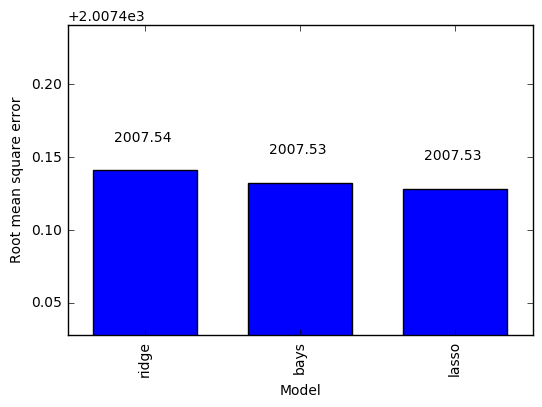

In [10]:
test_list=['ridge','bays','lasso']
test_param_set={'ridge':{'tol':np.logspace(-6,-1,3),'alpha':np.logspace(-4,-1,3)},'lasso':{'tol':np.logspace(-6,-1,3),'alpha':np.logspace(-4,-1,3)},'bays':{'alpha_1':np.logspace(-6,-1,3),'alpha_2':np.logspace(-6,-1,3),'lambda_1':np.logspace(-6,-1,3),'lambda_2':np.logspace(-6,-1,3)}}
histogram(test_list,test_param_set,X,Y,XT,YT)

In [ ]:
test_list=['GradientBoostingRegressor']
test_param_set={'GradientBoostingRegressor':{'loss':['ls','lad','huber','quantile'],'alpha':[0.9,0.5,0.2]}}
histogram(test_list,test_param_set,X,Y,XT,YT)

In [ ]:
test_list=['adaboost']
test_param_set={'adaboost':{'loss':['linear','square','exponential']}}
histogram(test_list,test_param_set,X,Y,XT,YT)

In [ ]:
test_list=['lasso']
test_param_set={'lasso':{'tol':np.logspace(-6,-1,10),'alpha':np.logspace(-4,-1,10)}}
histogram(test_list,test_param_set,X,Y,XT,YT)

In [ ]:
test_list=['ridge']
test_param_set={'ridge':{'tol':np.logspace(-6,-1,10),'alpha':np.logspace(-4,-1,10)}}
histogram(test_list,test_param_set,X,Y,XT,YT)

In [ ]:
test_list=['bays']
test_param_set={'bays':{'alpha_1':np.logspace(-6,-1,10),'alpha_2':np.logspace(-6,-1,10),'lambda_1':np.logspace(-6,-1,10),'lambda_2':np.logspace(-6,-1,10)}}
histogram(test_list,test_param_set,X,Y,XT,YT)

In [ ]:
test_list=['logistic']
test_param_set={'logistic':{'C':np.logspace(-6,-1,10),'tol':np.logspace(-4,-1,10)}}
histogram(test_list,test_param_set,X,Y,XT,YT)

best alpha for ridge regression is 0.1
best tol for ridge regression is 1e-06
{'alpha': 0.10000000000000001, 'tol': 9.9999999999999995e-07}
Ridge regression model RMSE is  2092.68601837


E:\program\anacoda\Anaconda2\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


best alpha_2 for bays regression is 1e-06
best lambda_1 for bays regression is 0.1
best lambda_2 for bays regression is 1e-06
best alpha_1 for bays regression is 1e-06
{'alpha_2': 9.9999999999999995e-07, 'lambda_1': 0.10000000000000001, 'lambda_2': 9.9999999999999995e-07, 'alpha_1': 9.9999999999999995e-07}
Bays model RMSE is  2092.69879965
best alpha for lasso regression is 0.1
best tol for lasso regression is 0.1
{'alpha': 0.10000000000000001, 'tol': 0.10000000000000001}
lasso regression model RMSE is  2092.6889837
best loss function for adaboost regression is linear
{'loss': 'linear'}
adaboost regression model RMSE is  2094.2066438
best loss function for GradientBoostingRegressor is ls
best alpha for GradientBoostingRegressor is 0.9
{'loss': 'ls', 'alpha': 0.90000000000000002}
GradientBoostingRegressor model RMSE is  2091.30066551
{'best_parameter_for_ridge_regression_are:alpha_is_0.1;tol_is_1e-06;': 2092.6860183723957, 'best_parameter_for_Bays_regression_are:alpha_2_is_1e-06;lambda_

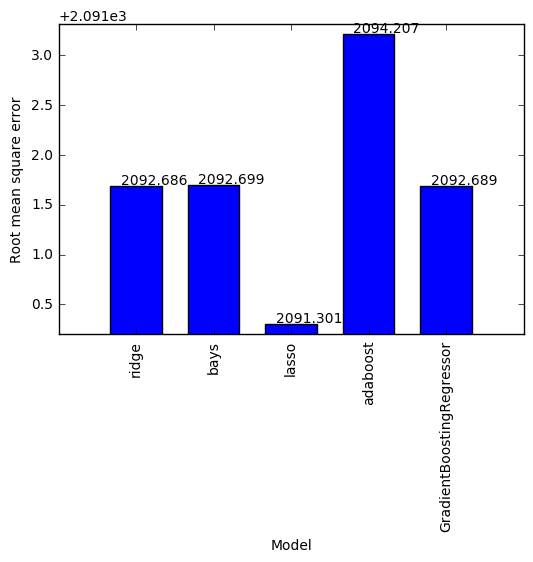

In [4]:
test_list=['ridge','bays','lasso','adaboost','GradientBoostingRegressor']
test_param_set={'GradientBoostingRegressor':{'loss':['ls','lad','huber','quantile'],'alpha':[0.9,0.5,0.2]},'adaboost':{'loss':['linear','square','exponential']},'ridge':{'tol':np.logspace(-6,-1,3),'alpha':np.logspace(-4,-1,3)},'lasso':{'tol':np.logspace(-6,-1,3),'alpha':np.logspace(-4,-1,3)},'bays':{'alpha_1':np.logspace(-6,-1,3),'alpha_2':np.logspace(-6,-1,3),'lambda_1':np.logspace(-6,-1,3),'lambda_2':np.logspace(-6,-1,3)}}
histogram(test_list,test_param_set,X,Y,XT,YT)